In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Intro
De la explicación en la documentación sobre el peltier ("prac6 mol peltier.pdf") se sabe que:


$$ \dfrac{T(s)}{I(s)} = \dfrac{(\alpha T_c)R_{th}}{1+R_{th}C_fs} $$


y que:

$$ P_e = \alpha \Delta T\,I + I^2R $$

Con lo cual, podemos deducir un modelo de primer orden del peltier.

Sabemos que nuestro peltier tiene una resistencia electrica de 1.8 $\Omega$. De la segunda ecuación se puede averiguar $\alpha$ y de la primera, se puede despejar $R_{th}$ del valor final de la respuesta del peltier a un escalón, y la capacidad, del tiempo de establecimiento de dicha respuesta.

Con esto, tenemos completo el modelo térmico del peltier para empezar a diseñar un lazo de control y estudiar las variaciones del sistema ante la aparición de distintos tipos de sujetos de prueba.

## Parámetro $\alpha$

In [3]:
# DATOS
I=6     # esto no es exacto
V=12    # esto es sarasa porque no se midió
R=1.8 
DT=25   # confiando en que el disipador sea muy bueno y
        # que la termocupla, exacta
# CUENTAS
Pe=V*I
Pj=I**2*R
alpha=(Pe-Pj)/DT/I
# RESULTADO
print("Alpha es",alpha)

Alpha es 0.048000000000000015


## Obtención de $R_{th}$ y $C_f$

Tau es 10.233059803644815 
La constante es 29.81890869140625


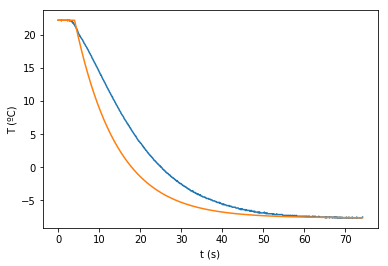

In [79]:
# CARGA DE DATOS ESCALÓN
data = np.loadtxt("data/pwm255frio.csv", delimiter=",")
tiempo = data[0,:]
temp = data[1,:]
e=.06 # tolerancia a la exactitud de los puntos de 90% y 10%
# Ploteo los datos para ver que se cargaron bien
plt.plot(tiempo,temp)
plt.xlabel("t (s)")
plt.ylabel("T (ºC)")
Tmax=np.max(temp)
Tmin=np.min(temp)
T10=Tmax+(Tmin-Tmax)*0.1
T90=Tmax+(Tmin-Tmax)*0.9
t10=tiempo[np.logical_and(temp>T10-e, temp<T10+e)]
t90=tiempo[np.logical_and(temp>T90-e, temp<T90+e)]
# Como los valores temporales pueden ser tuplas, o sea 
# que puede haber tiempos donde el valor de la temperatura
# no cambio, tomo aquellos que me dan el tau mas grande
tr=np.max(t90)-np.min(t10)
tau=tr/3

# Esta parte esta medio dibujada por el tema de Tc
Tc=30
Rth=(Tmax-Tmin)/(alpha*Tc)
Cf=tau/Rth

# VERIFICACIÓN
# El 4 lo saque a ojo
plt.plot(tiempo,Tmax-alpha*Tc*Rth*(1-np.exp(-(tiempo-4)/tau))*np.heaviside(tiempo-4,0.5))
print("Tau es",tau, "\nLa constante es",alpha*Tc*Rth)